![](title.jpg)

These are the slides presented by Jonathan Conning at the webinar [Modeling COVID-19: Disease Burdens, Economic Activities, and Policy Outcomes](http://www.roosevelthouse.hunter.cuny.edu/events/modeling-covid-19-disease-burdens-economic-activities-policy-outcomes/) at The Roosevelt House Public Policy Institute on May 27. 

This is a jupyter notebook with interactive widgets.  To see these visualizations you must run this notebook on a jupyter server on your own computer (or through a cloud service such as Binder or google colab (I will post links for this soon.)

This can also be viewed as a slideshow with the RISE extension.

# Modeling COVID-19: 
## Disease Burdens, Economic Activities, and Policy Outcomes

![](seminar.png)

**Jonathan Conning,** Department of Economics, Hunter College and The Graduate Center, City University of New York

<img src="media\nytimes.png" width="1000">

[ny times](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html)

<img src="media\new_deaths.png" width="1000">

## Infections and Externalities
Spring Breaker from Ohio | Unique Cell phones on one Ft. Lauderdale Beach 3/16
- | - 
<img src="media\partier.png" alt="Drawing" style="width: 400px;"/> | <img src="media/beach.jpg" alt="Drawing" style="width: 500px;"/>

**The same cellphones the following week**

<img src="media/network_map.jpg" alt="Drawing" style="width: 900px;"/>

[source](https://www.nytimes.com/2020/04/11/us/florida-spring-break-coronavirus.html)

## Modeling Epidemics: The SIR model


<img src="media\sir_image.png" width="600" align="center"/>

Three compartments: **Susceptible $S_t$, Infected $I_t$, Removed $R_t$**

Transitions depend on the **effective contact rate** $\beta$ (contact rate x transmission rate) and the **recovery rate** $\gamma$

## SIR  Model
$$
\begin{align}
\frac{dI}{dt} &= \beta \cdot S \cdot I - \gamma \cdot I  \\[8pt]
\frac{dS}{dt} &=-\beta \cdot S \cdot I  \\[8pt]
\frac{dR}{dt} &= \gamma \cdot I
\end{align}
$$

***Mass action*** or homogenous mixing assumption: transmission from infected to susceptibles is proportional to the product of the population sizes.

## Basic reproductive number $R_0$

- The average number of people an infectious person will infect, *assuming that the rest of the population is susceptible.*

$$R_0 = \frac{\beta}{\gamma}$$
- If $R_0>0$ epidemic grows, since new contagions arrive faster than removals.

  - $R_0$ for Covid19 in Oxford model for the UK: 2.25 to 2.75.  

  - $R_0$ in Wuhan estimated between 1.95 to 3.0. 

  - On Princess Diamond $R_0=14.8$   

### with $R_0 = 2.0$
<img src="media\billion.png" width="1000">


But the spread will eventually slow on its own 

... even without changes in policy or behavior.

## Effective Reproductive Number $R_t = R_0 \cdot S_t$


- epidemic slows as fewer susceptibles left to infect  
   - e.g. if $R_0 = 2.0$ and half have been removed (possibly via vaccination) then $R_t = 1.0$ and infections will decline. 


- **Herd Immunity Threshold**  at $S_t = \frac{1}{R_0}$ or once $I_t+R_t = \left (1-\frac{1}{R_0} \right )$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, interact_manual, fixed
from IPython.display import HTML, Video

import networkx as nx
import ndlib.models.epidemics as ep
import EoN


In [3]:
N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.3, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def plotSIR(beta=0.25, gamma=0.1, T=160):
    t = np.linspace(0, T, T)
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    fig = plt.figure(facecolor='w',figsize=(12,8))
    ax = fig.add_subplot(211, facecolor='#dddddd', axisbelow=True)
    ax2 = fig.add_subplot(212, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Removed')
    ax.text(50,0.9,r'$R_0 =$'+f'{beta/gamma:.2f}', fontsize=18)
    ax.set_xlabel('Time /days')
    ax.set_ylabel('proportion')
    ax.set_ylim(0,1)
    ax.set_xlim(0,T)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    #ax.axhline(1-1/(beta/gamma),linestyle=':')   
    ax2.plot(t, 1500*I/1000, 'g', alpha=0.5, lw=2, label='Deaths')
    legend2 = ax2.legend()
    legend2.get_frame().set_alpha(0.5)
    ax2.set_ylim(0,500)
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    plt.show()



SIR simuluation (not calibrated)

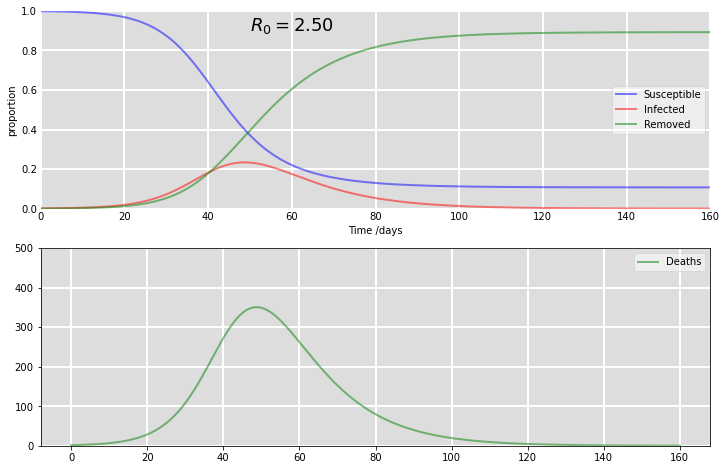

In [4]:
plotSIR(beta=0.25)

In [5]:
interact(plotSIR, beta=(0.1, 1, 0.005), gamma=(0.1, 1, 0.05), T=(150,250,10));

interactive(children=(FloatSlider(value=0.25, description='beta', max=1.0, min=0.1, step=0.005), FloatSlider(v…

<img src="media\herd.jpg" width="1000">

## Epidemics travel over Networks 

- Where and how we work, where we socialize, where we live and who we live with 

- Economic transactions also travel along networks

- Hence economic consequences of lockdowns and potential health-economic tradeoffs



## Fun with networks
Erdos-Renyi random graph $G(n,p)$ with $n$ nodes and a success probability of $p$ edges per node.   

$G(4,1)$: with 4 nodes and success probability 1 have all possible edges (six in this case).  In general the number of possible edges is  $\frac{n\cdot(n-1)}{2}\cdot p$

In [6]:
def drawg(n=25,m=0.2):
    g = nx.erdos_renyi_graph(n, m)
    nx.draw(g)
    plt.show()

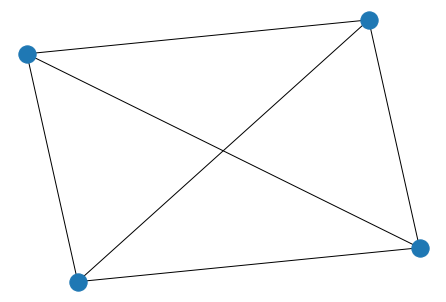

In [7]:
drawg(4,1)

$G(20, 0.1)$ The network will look different each time because it's created at random. 

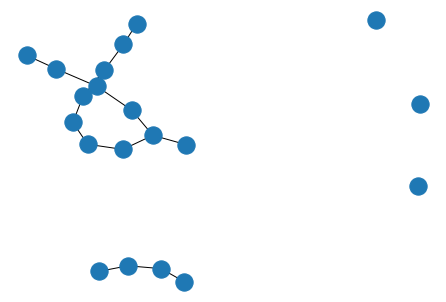

In [8]:
drawg(20,0.1)

In [9]:
interact_manual(drawg, n=(10,50,5), m=(0.025,1,0.025));

interactive(children=(IntSlider(value=25, description='n', max=50, min=10, step=5), FloatSlider(value=0.2, des…

## Stochastic SIR model
Each potential transmission along a network edge is a Bernoulli trial ('coin flip'), so number of infections passed on folllows a binomial. 
![](media/SIR_n.jpg)

In [10]:
def simsir(n, beta, gamma, T):
    states = np.zeros((T,3))
    S, I, R = n-1, 1, 0
    states[0, :] = [S,I,R]
    for t in range(1,T):
        contagions = np.random.binomial(n=1, p=beta*I/n, size = S).sum()
        removals = np.random.binomial(n=1, p=gamma, size = I).sum()
        S = S - contagions
        I = I  + contagions - removals
        R = R + removals
        states[t,:] = [S, I, R]
    return states


def plotsims(runs=5, n=100, beta=0.2, gamma=0.1, T=100):
    plt.figure(figsize=(12,7))
    if runs > 1:
        alp =0.4
    else:
        alp = 1
    for r in range(runs):
        states = simsir(n, beta, gamma, T)
        plt.plot(states[:,0], color ='blue', alpha = alp)
        plt.plot(states[:,1], color = 'red', alpha = alp)
        plt.plot(states[:,2], color = 'green', alpha = alp)
    plt.grid()


The path of the infection is stochastic (random luck). In some runs the infection never takes off. 

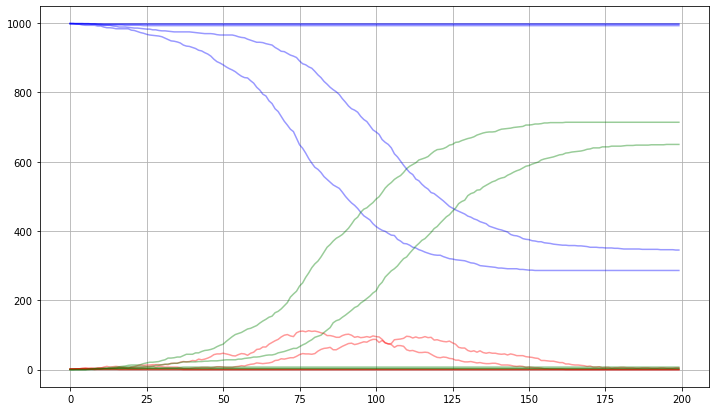

In [11]:
plotsims(runs = 5, n=1000, beta=0.175, gamma=0.1, T=200 )

In [12]:
interact_manual(plotsims, runs = (1,10,1), n=fixed(1000), beta=(0.01,0.2,0.01), gamma=(0.01,0.2,0.01), T=fixed(200) );

interactive(children=(IntSlider(value=5, description='runs', max=10, min=1), FloatSlider(value=0.2, descriptio…

# Epidemic spreading over networks



1. Over map grid 

2. Karate Club example.


In [13]:
G = nx.karate_club_graph()

def karate_ep(tau=0.3, ts =2, animate = False):
    nx_kwargs = {"with_labels":True} #optional arguments to be passed on to the networkx plotting command.
    print('doing Gillespie simulation')
    sim = EoN.Gillespie_SIR(G, tau, 0.1, return_full_data=True)
    sim.sim_update_color_dict({'S': '#becee8','I':'#ff2000', 'R':'darkgray'})
    if animate:
        print('creating animation video.. this will take time.')
        ani=sim.animate(time = ts, **nx_kwargs)
        ani.save('karate.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
        print('saved karate.mp4')
    else:
        sim.display(time = ts, **nx_kwargs) #plot at time 1.
    plt.show()

In [14]:
Video('media\SIR_grid_blue.mp4')

doing Gillespie simulation


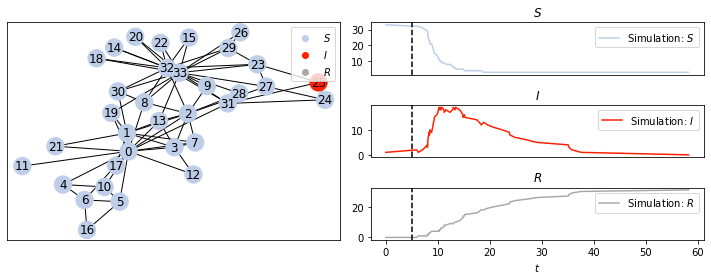

In [15]:
karate_ep(tau=0.25, ts=5)

In [16]:
interact(karate_ep, tau=(0.1,0.6,0.05), ts=(1,20,1),animate=fixed(False));

interactive(children=(FloatSlider(value=0.3, description='tau', max=0.6, min=0.1, step=0.05), IntSlider(value=…

In [17]:
Video('media\karate.mp4')